# Geologic information

**Description:** Download fault locations, geologic unit boundaries, and source information for Antarctic from the GeoMAP compilation. 

**Dataset:** 

Cox, Simon Christopher, Belinda Smith Lyttle, Samuel Elkind, Christine S. Smith Siddoway, Paul Morin, Giovanni Capponi, Tamer Abu-Alam, et al. “The GeoMAP (v.2022-08) Continent-Wide Detailed Geological Dataset of Antarctica.” PANGAEA, 2023. https://doi.org/10.1594/PANGAEA.951482.


**Associated paper:**

Cox, Simon C., Belinda Smith Lyttle, Samuel Elkind, Christine Smith Siddoway, Paul Morin, Giovanni Capponi, Tamer Abu-Alam, et al. “A Continent-Wide Detailed Geological Map Dataset of Antarctica.” Scientific Data 10, no. 1 (May 18, 2023): 250. https://doi.org/10.1038/s41597-023-02152-9.


In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions

In [2]:
fetch.geomap(
    version="faults",
    # available options
    # region,
)

,objectid,NAME,DESCR,TYPENAME,TYPE_URI,ACCURACY,EXPOSURE,ACTIVITY,DEFRMSTYLE,DEFRM_URI,...,RESSCALE,CAPTSCALE,CAPTDATE,MODDATE,PLOTRANK,FEATUREID,SPEC_URI,SYMBOL,Shape_Length,geometry
0,1,,fault (inactive),fault,http://resource.geosciml.org/classifier/cgi/fa...,approximate,concealed,inactive,unknown,http://www.opengis.net/def/nil/OGC/0/unknown,...,500000,50000,2019-04-15,2019-04-03,250000,ATA_GeoMAP_faults_00001,http://www.opengis.net/def/nil/OGC/0/missing,,3.989215e+03,"MULTILINESTRING ((-2631789.265 1593859.332, -2..."
1,2,,fault (inactive),fault,http://resource.geosciml.org/classifier/cgi/fa...,approximate,concealed,inactive,unknown,http://www.opengis.net/def/nil/OGC/0/unknown,...,500000,50000,2019-04-15,2019-04-03,250000,ATA_GeoMAP_faults_00002,http://www.opengis.net/def/nil/OGC/0/missing,,4.860209e+03,"MULTILINESTRING ((-2626731.089 1595742.734, -2..."
2,3,,fault (inactive),fault,http://resource.geosciml.org/classifier/cgi/fa...,approximate,exposed,inactive,unknown,http://www.opengis.net/def/nil/OGC/0/unknown,...,500000,50000,2019-04-15,2019-04-03,250000,ATA_GeoMAP_faults_00003,http://www.opengis.net/def/nil/OGC/0/missing,,2.576661e+03,"MULTILINESTRING ((-2625953.454 1597731.139, -2..."
3,4,,"fault (inactive), feature inferred",fault,http://resource.geosciml.org/classifier/cgi/fa...,uncertain,unknown,inactive,unknown,http://www.opengis.net/def/nil/OGC/0/unknown,...,500000,50000,2019-04-15,2019-04-03,250000,ATA_GeoMAP_faults_00004,http://www.opengis.net/def/nil/OGC/0/missing,,2.164953e+03,"MULTILINESTRING ((-2623736.366 1598522.161, -2..."
4,5,,fault (inactive),fault,http://resource.geosciml.org/classifier/cgi/fa...,approximate,exposed,inactive,unknown,http://www.opengis.net/def/nil/OGC/0/unknown,...,500000,50000,2019-04-15,2019-04-03,250000,ATA_GeoMAP_faults_00005,http://www.opengis.net/def/nil/OGC/0/missing,,2.518667e+03,"MULTILINESTRING ((-2638573.876 1584988.955, -2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,1787,geological province boundary within tectonic b...,"suture (inactive), feature inferred",fault,http://resource.geosciml.org/classifier/cgi/fa...,uncertain,unknown,inactive,unknown,http://www.opengis.net/def/nil/OGC/0/unknown,...,10000000,1000000,2020-10-01,2022-07-18,500000,ATA_GeoMAP_faults_01780,http://www.opengis.net/def/nil/OGC/0/missing,,4.427161e+05,"MULTILINESTRING ((-1381344.657 500083.051, -13..."
1780,1788,geological province boundary within tectonic b...,"suture (inactive), feature inferred",fault,http://resource.geosciml.org/classifier/cgi/fa...,uncertain,unknown,inactive,unknown,http://www.opengis.net/def/nil/OGC/0/unknown,...,10000000,1000000,2020-10-01,2022-07-18,500000,ATA_GeoMAP_faults_01781,http://www.opengis.net/def/nil/OGC/0/missing,,4.919584e+05,"MULTILINESTRING ((-1475007.344 98444.748, -144..."
1781,1789,geological province boundary within tectonic b...,"suture (inactive), feature inferred",fault,http://resource.geosciml.org/classifier/cgi/fa...,uncertain,unknown,inactive,unknown,http://www.opengis.net/def/nil/OGC/0/unknown,...,10000000,1000000,2020-10-01,2022-07-18,500000,ATA_GeoMAP_faults_01782,http://www.opengis.net/def/nil/OGC/0/missing,,2.514158e+05,"MULTILINESTRING ((-1018864.765 259840.904, -97..."
1782,1790,geological province boundary within tectonic b...,"suture (inactive), feature inferred",fault,http://resource.geosciml.org/classifier/cgi/fa...,uncertain,unknown,inactive,unknown,http://www.opengis.net/def/nil/OGC/0/unknown,...,10000000,1000000,2020-10-01,2022-07-18,500000,ATA_GeoMAP_faults_01783,http://www.opengis.net/def/nil/OGC/0/missing,,1.492810e+06,"MULTILINESTRING ((-156648.686 -277229.846, -15..."


In [3]:
version_names = [
    "faults",
    "units",
    # "sources", # not interesting to plot
    # "quality", # not interesting to plot
]


data = []
for name in version_names:
    d = fetch.geomap(
        version=name,
        # available options
        # region,
    )
    # only keep subset of largest units to speed up the plotting below
    if name == "units":
        d = d.sort_values(by="Shape_Area", ascending=False).copy()
        d = d.iloc[0 : int(len(d) / 4)]  # largest 1/4 of shapes
    data.append(d)

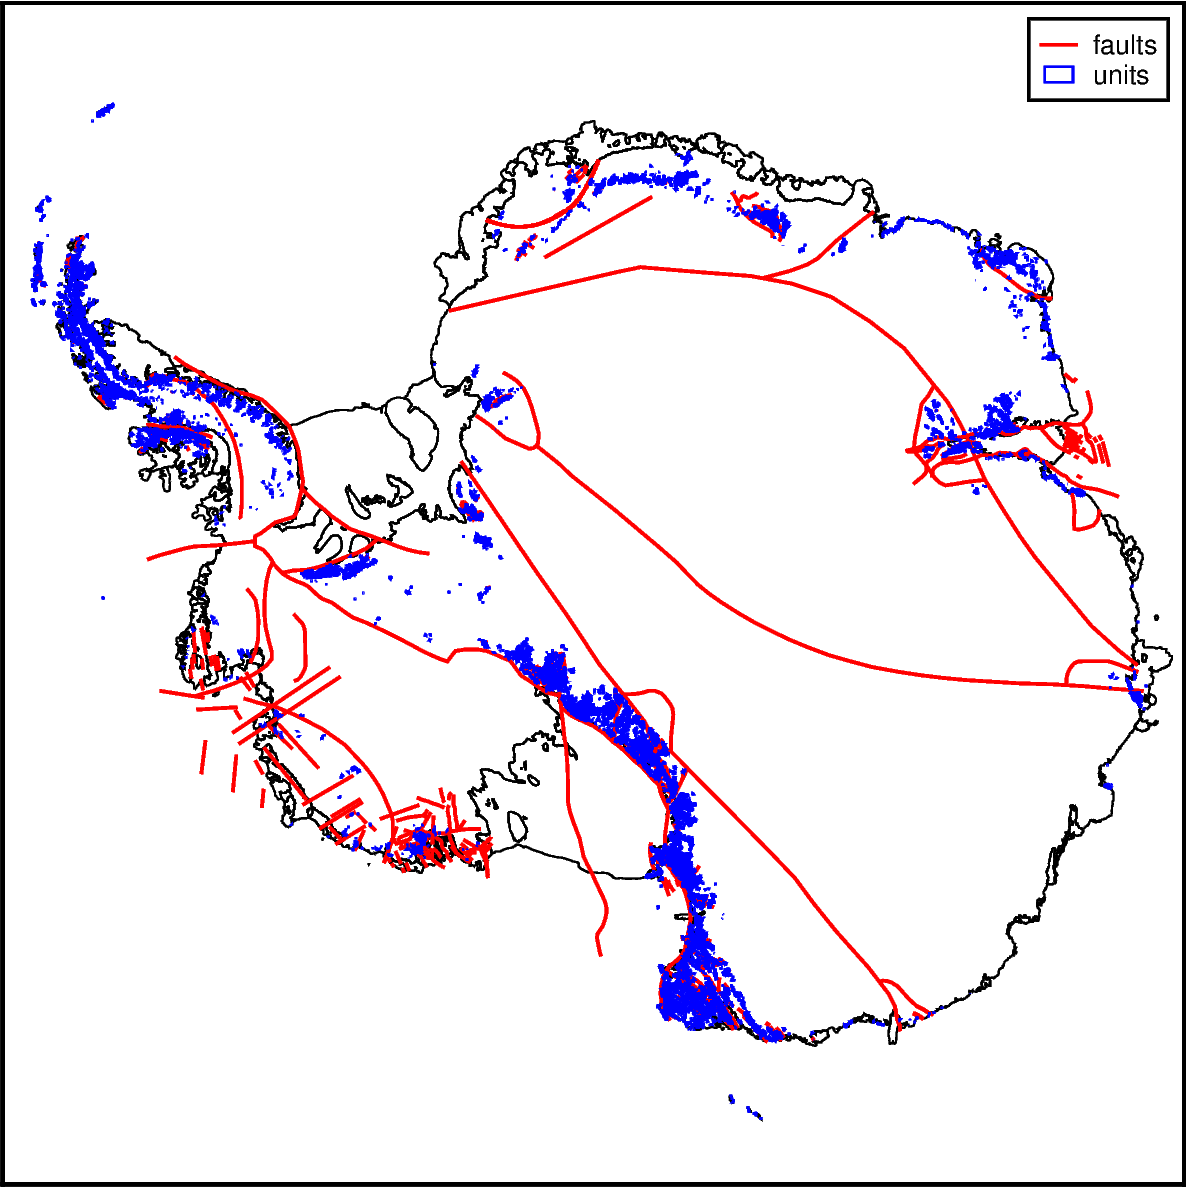

In [4]:
fig = maps.basemap(
    region=regions.antarctica,
    hemisphere="south",
    coast=True,
)


# plot the shapefiles
pens = ["1.2p,red", ".8p,blue"]
for i, v in enumerate(version_names):
    fig.plot(data[i], pen=pens[i], label=v)

# add a legend
fig.legend()

fig.show(dpi=200)

## Plotting faults

You can also use the function `maps.add_faults` for an easy way to specify and plot faults.

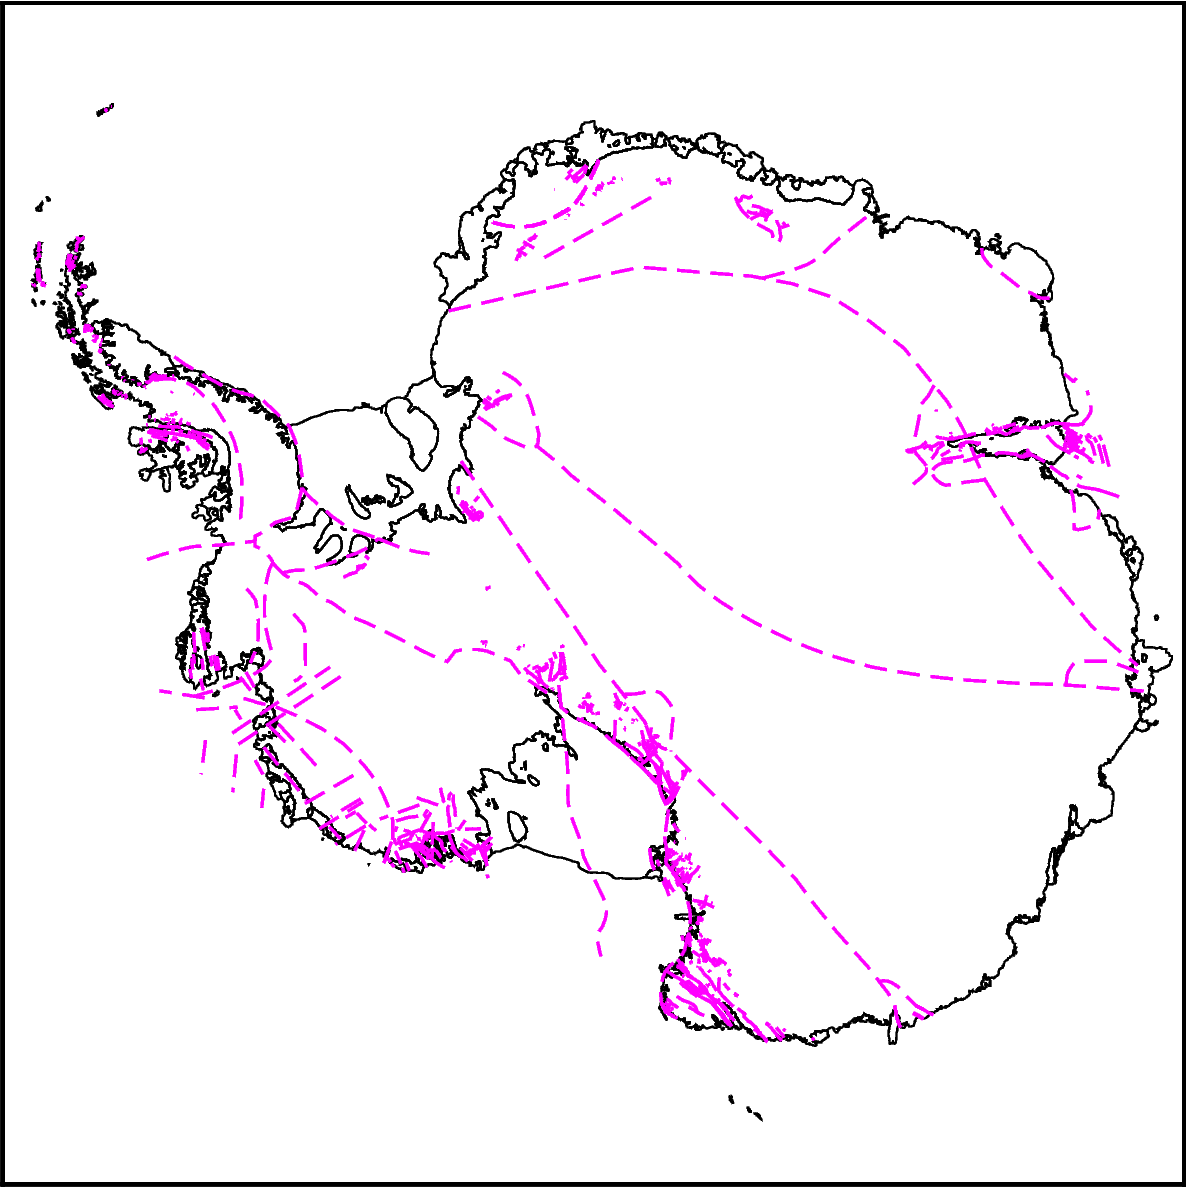

In [5]:
fig = maps.basemap(
    region=regions.antarctica,
    hemisphere="south",
    coast=True,
)

# with defaults
maps.add_faults(
    fig=fig,
)

fig.show(dpi=200)

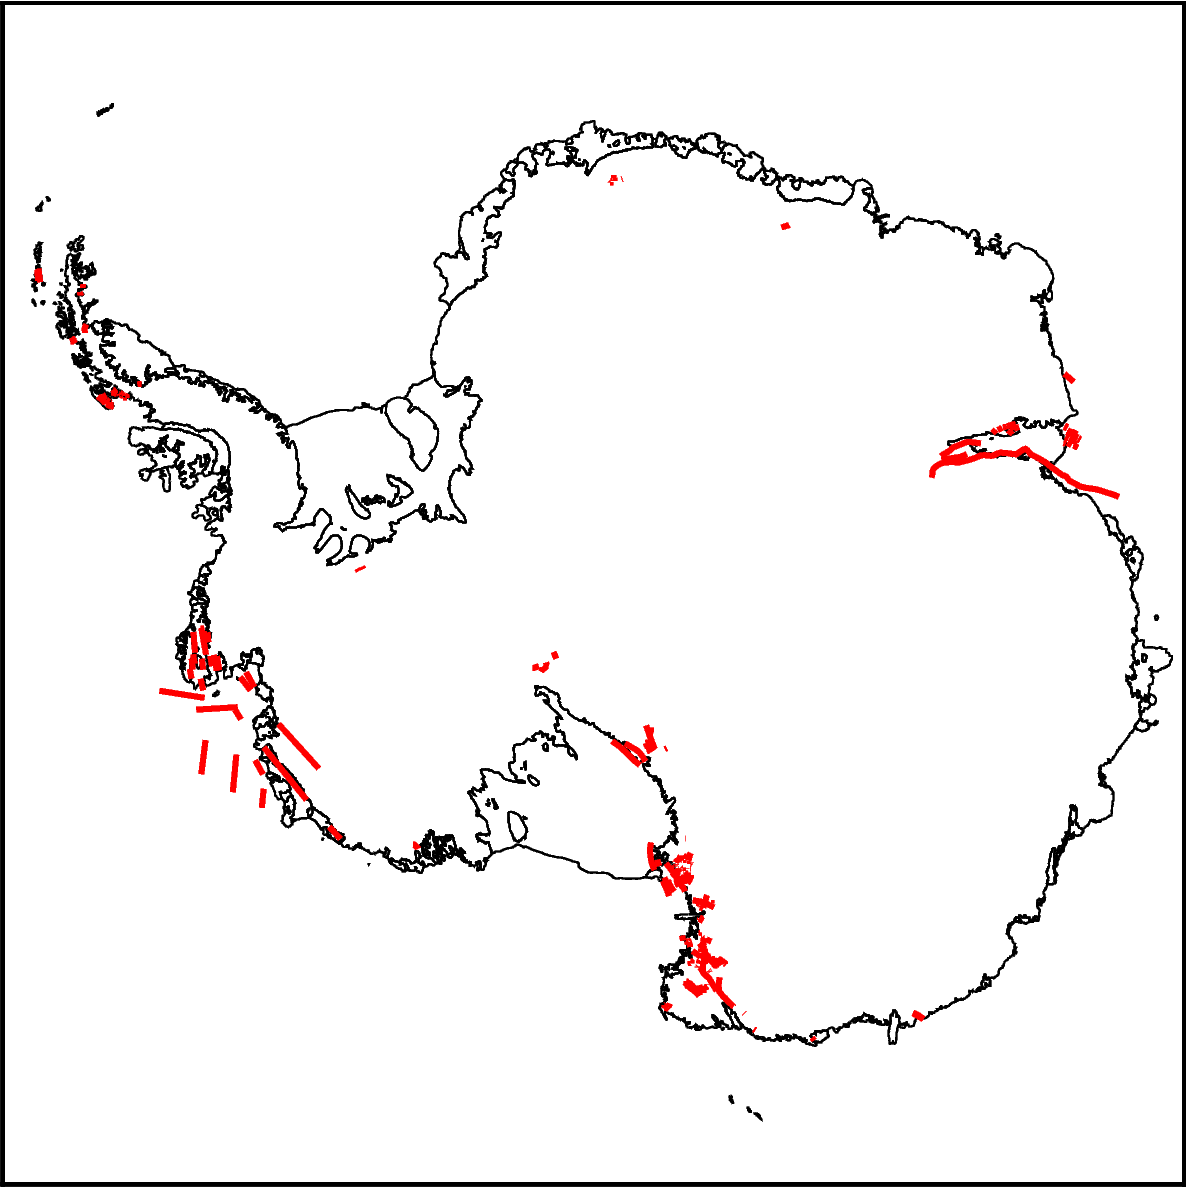

In [6]:
fig = maps.basemap(
    region=regions.antarctica,
    hemisphere="south",
    coast=True,
)

# specifying fault types
maps.add_faults(
    fig=fig,
    fault_activity="inactive",
    fault_motion="normal",
    fault_exposure="inferred",
    pen="2p,red",
)

fig.show(dpi=200)